<center><h1>Kinematics</h1></center>

## **Computation of Velocity and Acceleration** 
Kinematic quantities are ultimately defined in function of some time derivative of
the position of an object, in cartesian coordinates x or angular coordinate θ. Let us
learn how to express these equations at discrete times $t_i$ . 
Since we describe all variables in function of time, we have to define a time array
first.

Let us define a regular array $t_0$,$t_1$,$t_2$, ... where $t_i-t_{i-1}$ =$ \Delta t$ are non-dimensional
time intervals. If we initially divide the time range in 20 intervals assume time
nondimensional between 0 and 1, we can write:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

tmax = 2.0 #ending time in seconds
tmin = 0.0 #starting time 
intervals = 25 #number of divisins on time interval
dt =(tmax-tmin) / intervals #time stepping
nt = intervals + 1
time = np.arange(nt) * dt
print(time)



[0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64 0.72 0.8  0.88 0.96 1.04
 1.12 1.2  1.28 1.36 1.44 1.52 1.6  1.68 1.76 1.84 1.92 2.  ]


Let us first consider the easiest case, the one in which we know the position of the
object in time and we want to extract velocity and acceleration. Harmonic motion
is a classical example: if the position of the object oscillates (like the horizontal
position of a sphere attached to a pendulum) the position will follow a law like
x = sin(2π t), where the initial position was set to zero and the time necessary for
an entire oscillation is one. In terms of a Python array:

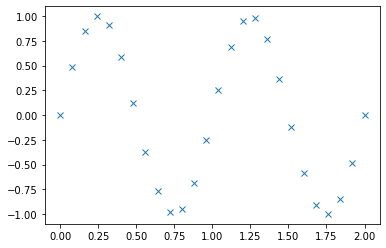

In [4]:
x=np.zeros(nt) #setting Initial position to zero
x[0:nt]=np.sin(2*np.pi*time[0:nt])
plt.plot(time,x,'x')
plt.show()

Velocity and acceleration are defined as the the first and second derivative of
position in time, respectively, therefore they can be approximated in function of the
time discretization:

$$v(t)=\frac{dx(t)}{dt}=\frac{x(t_i)-x(t_{i-1})}{t_i-t_{i-1}}=\frac{x_i-x_{i-1}}{\Delta t}$$<br/>
where we have assumed that ∆t = $t_{i+1} − t_i$ is independent from i. While intuitively
correct, the above approximation is however biased because oriented backward,
because approximating the derivative at time t(i) at its left side. A symmetric forward
formulation would be equally logical:

$$v(t)=\frac{dx(t)}{dt}=\frac{x(t_{i+1})-x(t_{i})}{t_{i+1}-t_{i}}=\frac{x_{i+1}-x_{i}}{\Delta t}$$


but it would be less practical since in many problems we do not know the future
position. The most natural definition of derivative is the centered one, that is just the
arithmetic average of the two:

$$v(t)=\frac{dx(t)}{dt}=\frac{1}{2} \left( {\frac{x(t_{i+1})-x(t_{i})}{t_{i+1}-t_{i}}+\frac{x(t_i)-x(t_{i-1})}{t_i-t_{i-1}}}\right)=\frac{x_{i+1}-x_{i-1}}{2\Delta t}$$

Although not sided backward or forward, this definition has the odd property of
not containing the term $x_i$ , i.e., the position at the time in which we want calculate the
velocity. This characteristic produces dispersion, i.e., the derivative is slightly more
flat than the other approximation. In other words the information on the behavior of
the derivative functions is diffused laterally. 


The acceleration can be either calculated as the first derivative of the velocity
in time or as the second derivative of position in time. The most compact and less
diffusive formulation to obtain acceleration from position is obtained by combining
backward and forward formulations:

$$a(t)=\frac{d^2x(t)}{dt^2}=\frac{x(t_{i+1})-2x{t_i}+x(t_{i})}{(t_{i+1}-t_{i-1})^2}=\frac{x_{i+1}-2x_i+x_{i-1}}{\Delta t^2}$$

Let us calculate the first derivative using the forward, backward and centered
definitions.

In [5]:
#nt=5
dxdtForward = np.zeros(nt)
dxdtBackward = np.zeros(nt)
dxdtCentered = np.zeros(nt)

We can now calculate the forward and backward derivatives. As we observed in
the past chapter, this operation is much faster if instead of a loop operators such as
*for* or *while* we use the properties NumPy arrays:

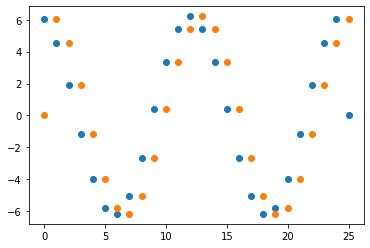

In [6]:
dxdtForward[0:nt-1] = (x[1:nt]-x[0:nt-1])/dt
dxdtBackward[1:nt] = (x[1:nt]-x[0:nt-1])/dt

plt.plot(dxdtForward,'o')
plt.plot(dxdtBackward,'o')
plt.show()

Using this definition we also observe that backward and forward derivatives in time
are the same, it just depends on whether dxdt is associated to *time[1:nt]*. Thinking
at the concept of the staggered grid that we just introduced, it means that either we
are shifting the grid backward or forward in time.
Different is the case for the centered derivative. This is in fact not immediately
defined at the edges, but only for *nt − 2* points. We can use again the fast array
operations to define it as:

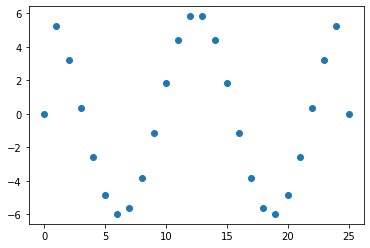

In [7]:
dxdtCentered[1:nt-1] = 0.5 * (dxdtForward[1:nt-1] + dxdtBackward[1:nt-1])
plt.plot(dxdtCentered,'o')
plt.show()

Notice that the allocation of the NumPy array was automatically performed by
Python, however dxdtCentered will be 19 elements long. We could have equally
defined it as *dxdtCentered = (x[2:nt]-x[0:nt-2])/(2*dt)*, obtaining the same result.
Let us now plot the position in function of time using the Matplotlib tools that we
introduced before:

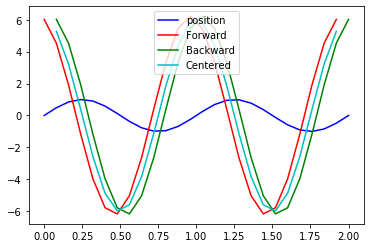

In [8]:
plt.plot(time, x, color='b', label='position')
plt.plot(time[0:nt-1], dxdtForward[0:nt-1], color='r', label='Forward')
plt.plot(time[1:nt], dxdtBackward[1:nt], color='g', label='Backward')
plt.plot(time[1:nt-1], dxdtCentered[1:nt-1], color='c', label='Centered')
plt.legend(loc = 'upper center')
plt.show()
#print("\n \t \tFigure 4.1")

The figure above shows three definitions of velocity: Forward, Backward, and Centered. The time on the
x-axis is discretized with 20 points. The three velocities almost overlap, but a shift is visible. 

In [9]:
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2

The array containing the second derivative dx2dt2 has the same length of dxdt-
Centered. We can plot now position, velocity, and acceleration together:

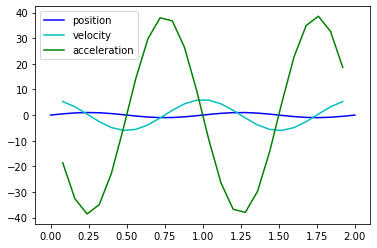

5.832731206834653
38.57788732632953


In [10]:
plt.plot(time,x,color='b',label='position')
plt.plot(time[1:nt-1],dxdtCentered[1:nt-1],color='c',label='velocity')
plt.plot(time[1:nt-1],d2xdt2,'g',label='acceleration')
plt.legend(loc='upper left')
plt.show()

print(dxdtCentered.max())
print(d2xdt2.max())

Figure above: Position, Centered Velocity, and Acceleration. The maximum values of the velocity is equal to 2 ∗ π
times the position, and so is maximum acceleration versus maximum velocity. The last value on
the right of the velocity and the edge values of the acceleration are missing

### Exercise 1

Calculate velocity and acceleration for the following 1D trajectory $x=sin^2(\pi t)cos(\pi t)$.

In [11]:
# here write your solution











### Integrate Acceleration

Let's use the same values for nt, dt, intervals, tmin and tmax. Let’s initially define an array for
time.

In [12]:
import numpy as np
tmax = 2.0
tmin = 0.0
intervals = 10
dt =(tmax-tmin) / intervals
nt = intervals + 1
time = np.arange(nt) * dt

We expect that at every
integration the size of the arrays (velocity and position), will increase, opposite to
the derivative operator

In [13]:
acc = np.ones(nt) * (-10.0) #m/s2


Let us now create an empty vector that contains the velocity and let us initiate the
value at time $t_0 = 0$. Here I choose $v_0 = 5.0 m/s$:

In [14]:
vel = np.zeros(nt)
vel[0]=5.0 #m/s

Starting from the first value v o to the last one. For the specific case of constant
acceleration it is not relevant whether our integration is forward or backward, so we
can simply write:

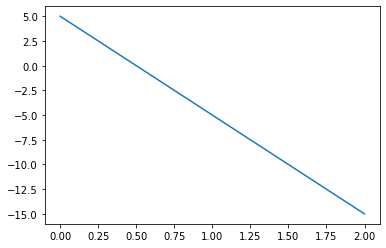

In [15]:
for it in np.arange(nt-1):
    vel[it+1] = vel[it]+acc[it]*dt
plt.plot(time,vel)
plt.show()

Let's repeat the operation for the position. Note that the array’s length increases
at each integration. In this case the velocity is not constant, and the small difference between using the past or the next velocity value adds up when calculating the
position:

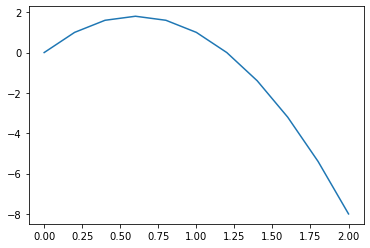

In [16]:
pos = np.zeros(nt)
pos[0] = 0.0 #m
for it in np.arange(nt-1):
    pos[it+1] = pos[it] + vel[it]*dt
plt.plot(time,pos)
plt.show()

In analogy with the past section, where I used the past velocity *vel[it]* to integrate
the position, I am here assuming a forward approximation. Calculating the average
between two velocities in two consecutive points will allow us to have a much better
estimate of the average velocity for every interval, and therefore avoid any kind of
bias. This can be implemented by creating a vector that contains this average velocity
and then use it for the integration:

In [17]:
posAve = np.zeros(nt)
velAverage = 0.5 * ( vel[0:nt-1] + vel[1:nt])
for it in np.arange(nt-1):
    posAve[it+1] = posAve[it] + velAverage[it]*dt

Using the plotting tools learned in the past section one can now visualize the
different results:

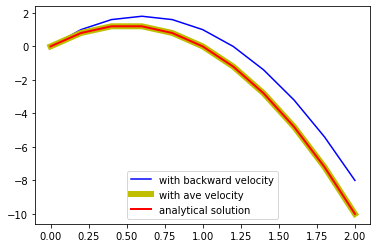

In [18]:
plt.plot(time,pos,color='b',label='with backward velocity')
plt.plot(time,posAve,color='y',linewidth=6,label='with ave velocity')
plt.plot(time,-0.5*10.*time**2+5.0*time,linewidth=2, color='r',label='analytical solution')
plt.legend(loc='lower center')
plt.show()

### Exercise 2

Integrate an accelleration that is not constant but follows the following harmonic dependency: $a=cos(\pi t)$.

In [19]:
#HERE INSERT YOUR SOLUTION










<center><h1>1D Operator formulation</h1></center>

Let's integrate our operator knowledge, exploring how to create simple operators for the 1D problems that we analyzes in the past. Let's start from the continuity equation, in 1D. This is extremely straightforward because $\nabla \cdot \mathbf{v} = 0$ becomes $\frac{\partial v_x}{\partial x}=0$. Let's therefore create the derivative operator in 1D.

We already discovered in the previous experiences that derivatives can be done forward, backward or centered. Let's recall here what we did in the Kinematics Section.

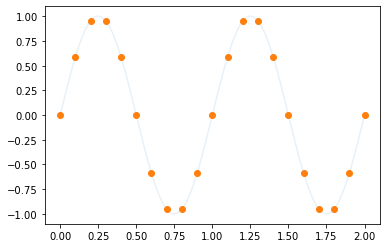

array([ 0.        ,  4.75528258,  1.81635632, -1.81635632, -4.75528258,
       -5.87785252, -4.75528258, -1.81635632,  1.81635632,  4.75528258,
        5.87785252,  4.75528258,  1.81635632, -1.81635632, -4.75528258,
       -5.87785252, -4.75528258, -1.81635632,  1.81635632,  4.75528258,
        0.        ])

In [20]:
import matplotlib.pyplot as plt
import numpy as np
tmax = 2.0 #ending time in seconds
tmin = 0.0 #starting time 
intervals = 20 #number of divisions on time interval
dt =(tmax-tmin) / intervals #time stepping
nt = intervals + 1
time = np.arange(nt) * dt

x=np.zeros(nt) #setting Initial position to zero

x[0:nt]=np.sin(2*np.pi*time[0:nt])
test= np.arange(1001)* (tmax-tmin) / 1000

plt.plot(test,np.sin(2*np.pi*test),'-',alpha=0.1)
plt.plot(time,x,'o');
plt.show()

dxdtForward = np.zeros(nt)
dxdtBackward = np.zeros(nt)
dxdtCentered = np.zeros(nt)

dxdtForward[0:nt-1] = (x[1:nt]-x[0:nt-1])/dt
dxdtBackward[1:nt] = (x[1:nt]-x[0:nt-1])/dt
dxdtCentered[1:nt-1] = 0.5 * (dxdtForward[1:nt-1] + dxdtBackward[1:nt-1])
dxdtCentered

where the indexes indicate the point in space where you are calcualting your derivative. Let's first create together the matrix equivalent to dxdtForward:



Since dxdtForwardOp is simply 1/dt for the difference between the next and the present value of x, then it is made of two diagonals next to each other, one to the right and the other on the main diagonal.

In [21]:
dxdtForwardOp = -1/dt*np.diag(np.ones(nt)) + 1/dt*np.diag(np.ones(nt-1),1)
print(dxdtForwardOp)

[[-10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  10.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0

In [22]:
np.diag(np.arange(5),-1)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 4, 0]])

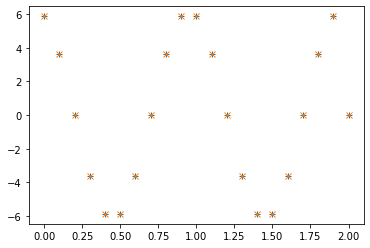

[-8.88178420e-16  8.88178420e-16  0.00000000e+00 -8.88178420e-16
  8.88178420e-16  0.00000000e+00 -4.44089210e-16  6.66133815e-16
  0.00000000e+00  0.00000000e+00 -8.88178420e-16 -4.44089210e-16
  6.66133815e-16  0.00000000e+00  0.00000000e+00  8.88178420e-16
  0.00000000e+00  4.44089210e-16 -8.88178420e-16  8.88178420e-16
 -4.89858720e-15]


In [23]:
# let's see if it works!
dxdtForward[0:nt-1] = (x[1:nt]-x[0:nt-1])/dt
dxdtForward2 = np.zeros(nt)
dxdtForward2= dxdtForwardOp.dot(x)

plt.plot(time,dxdtForward,'+');
plt.plot(time,dxdtForward2,'x');
plt.show()

print(dxdtForward-dxdtForward2)
# PERFECT!

A more careful look at what we created should highlight that the solution was not perfect. One point is miscalculated. The last one. This is normal, because we need the next number to calculate the derivative. So, out of nt values for x, we can calculate only nt-1 values of the derivative, using this first order approximation. But that is ok. Just we understand that the operator should go from nt to nt-1, so it should not be a squared matrix but a rectangular one, with dimensions $nt * (nt-1)$

### Exercise 3
Create the other two matrix operators, the backward and centered ones 

In [24]:
# here write your solution



Let's now calculate the second derivative. We remember the nicely centerd formulation from the kinematic experience.

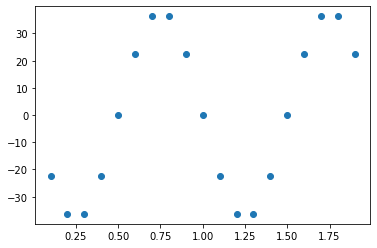

In [25]:
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2
plt.plot(time[1:-1],d2xdt2,'o');
plt.show()
#where you see that now it has dimensions nt-2

### Exercise 4
Create directly this operator, d2xdt2

In [26]:
# write here your solution



Let's do now something more interesting. Let's create the second operator by multiplying the operator derivative in one 1D by itself. Clearly, we need to be careful to the dimensions (reduction of one for each derivative). Other than that, we just have to repeat the work twice. Let's what happens if I use only the centered version of the 1D operators.


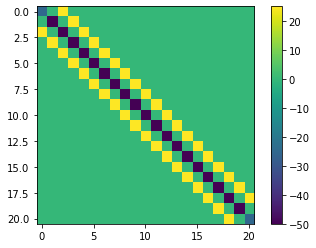

In [27]:
# first I create the centered operator like before
dxdtCenteredOp = -1/2/dt*np.diag(np.ones(nt-1),-1) + 1/2/dt*np.diag(np.ones(nt-1),1)
# and then a multiply it by itself:
d2xdt2OpCentered = dxdtCenteredOp.dot(dxdtCenteredOp)
#print(d2xdt2OpCentered)
plt.imshow(d2xdt2OpCentered)
plt.colorbar()
plt.show()

Which is different from the operator that we just created directly. How can this be??

Do you remember when introducing these derivatives in kinematics, we said that this kind of operator is dispersive. Too dispersive! In fact, although the results look similar (try it!) it is not the same, and smooths the function a bit.

So, how do we create the correct (best!) operator? The trick is to use the forward and the backward. Which seems a paradox because each one was less correct than the centered one. But the poins is that they were biased, but not dispersive, and the two biases disappear when multypling one with the other! 

### Exercise 5
Create now the operator d2xdt2, by multypling either the forward and the backward or the backward and the forward. Does the result change? And compare how it operates with the best estiamate 
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2


In [28]:
#here write your solution






## Sparse operators

Let's address now a last problem, which is actually of minor importance at the low resolution that we use now, but of great concern for higher resolution and fundamental in 2D. Sparse and dense operators. The problem is simply that the matrix above, is almost entire made by zeros. So, we are filling up the memory of our computers of zeros. What a waste of memory! And what a waste of computing time at multypling all these zeros for x or for other zeros (when multypling one operator for another). 

Computer scientists figured out long time ago that there had to be a better way. They invented therefore sparse matrices. They can be easily studies from scipy or numpy sparse. But quickly said here, sparse matrices are written in the computer not as the list of values, but as the list of non-zero values, as (i,j,value) where i and j are the coordinates of the non-zero value. 

Of the many sparse arrays that exist in Python, the CSR format (Compressed Sparse Column format) is specially suitable for fast matrix vector products. Since all our matrix come from some combinations of diagonal matrices, we can combine them into a CSR format. Let's see an example for the matrices that we created earlier. 

In [29]:
import scipy.sparse as sparse

In [30]:
# We start from a diagonal sparse matrix:  
a=sparse.dia_matrix((np.ones(nt)*3,0), shape=(nt,nt) ).tocsr()
print(a)

  (0, 0)	3.0
  (1, 1)	3.0
  (2, 2)	3.0
  (3, 3)	3.0
  (4, 4)	3.0
  (5, 5)	3.0
  (6, 6)	3.0
  (7, 7)	3.0
  (8, 8)	3.0
  (9, 9)	3.0
  (10, 10)	3.0
  (11, 11)	3.0
  (12, 12)	3.0
  (13, 13)	3.0
  (14, 14)	3.0
  (15, 15)	3.0
  (16, 16)	3.0
  (17, 17)	3.0
  (18, 18)	3.0
  (19, 19)	3.0
  (20, 20)	3.0


In [31]:
# the zero is the offset. Let's play with it a bit:
a=sparse.dia_matrix((np.ones(nt)*5,5), shape=(nt,nt) ).tocsr()
print(a)

  (0, 5)	5.0
  (1, 6)	5.0
  (2, 7)	5.0
  (3, 8)	5.0
  (4, 9)	5.0
  (5, 10)	5.0
  (6, 11)	5.0
  (7, 12)	5.0
  (8, 13)	5.0
  (9, 14)	5.0
  (10, 15)	5.0
  (11, 16)	5.0
  (12, 17)	5.0
  (13, 18)	5.0
  (14, 19)	5.0
  (15, 20)	5.0


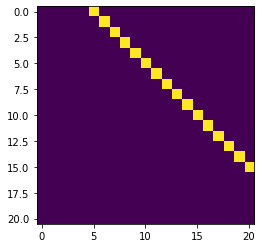

In [32]:
# you can see that the representation is not the one of before. 
# what if we want to visualize it as a normal matrix? We can always change into a standard matrix and plot it.
a2=a.toarray()
plt.imshow(a2)
plt.show()

In [33]:
# products are just the same:
y=a.dot(x)
y2=a2.dot(x)
print(y)
print(y2)

[ 6.12323400e-16 -2.93892626e+00 -4.75528258e+00 -4.75528258e+00
 -2.93892626e+00 -1.22464680e-15  2.93892626e+00  4.75528258e+00
  4.75528258e+00  2.93892626e+00  1.83697020e-15 -2.93892626e+00
 -4.75528258e+00 -4.75528258e+00 -2.93892626e+00 -2.44929360e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
[ 6.12323400e-16 -2.93892626e+00 -4.75528258e+00 -4.75528258e+00
 -2.93892626e+00 -1.22464680e-15  2.93892626e+00  4.75528258e+00
  4.75528258e+00  2.93892626e+00  1.83697020e-15 -2.93892626e+00
 -4.75528258e+00 -4.75528258e+00 -2.93892626e+00 -2.44929360e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


### Exercise 6

Create now the operators dxdtcentered and d2xdt2 using sparse matrices. You can also try to use the matrix product (using backward and forward) to build the second derivative. Check that the solution is correct either by comparing the matrix with .toarray or mulutplying it for a test x vector.

In [34]:
# write here your solution for dxdtcentered














In [35]:
#representation of d2xdt2













### Exercise 7

Compare the speed (using %timeit) to multiply one matrix operator and one vector, and two matrix operators, testing size of x varying among 10, 100, 1000, 10000. Plot the result in log10 to see the linear trend.

In [36]:
# write here your solution














<center><h1>Diffusion and Laplacian Operator in 1D</h1></center>




The diffusion of taste is not the same thing as the improvement of taste.

William Hazlitt


The most important physical process in Geodynamics is probably the second law of thermodynamics that says that the disorder in the universe constantly grows. In fact physics tells us that the second law is the main indication of what is time, given that the growth of entropy is the only non-reversible process among the fundamental laws of physics. 

Among the geodynamic processes the growth of the entropy manifests itself mainly by diffusional processes. Diffusion is in fact a throughly irreversible processes, characterized by the chaotic mix of particles of different nature, like the diffusion of a drop of color in water, or by the flow of heat from a hot to a cold body, or by the diffusion of a liquid in a porous media (Darcy's flow). All these phenomena happen in any long term process, making diffusion an ubiquitous actor in geodynamics. 

Historically the similarity between diffusion of a fluid into another fluid and the diffusion of heat in a solid convinced scientists that heat was nothing else than a invisible fluid, called *calorico* that was transporting this energy, heat. Maxwell and Boltzmann were the pioneers who figured out first the equivalence between heat and kinetic energy, and that therefore the temperature was nothing else than the measure of the kinetic energy of every single mode of motion of particles. For example for a monoatomic Noble gas the average kinetic $\frac{1}{2} m v^2$ of each atom is $\frac{3}{2}kT$ where k is the Boltzmann constant ($1.38 \cdot  10^{23} \; J/K$) and m is the mass of the atom. 


## Theory of the Diffusion Processes

In geodynamics we mostly deal with crystalline rocks for which the heat is stored as the kinetic energy of vibrating atoms whose position oscillates around the equilibrium position in the lattice. This kinetic energy is transmitted to the neighboring atoms through inter-atomic electric forces. Also here the kinetic energy associated to the atomic oscillation is $\frac{3}{2}kT$. The fact that all these different phenomena are controlled by the same laws is at the same time a truly remarkable aspect of physics and also greatly simplifies the life of geodynamic modelers because it makes the numerical modeling of these effects very similar. 

For example after their formation at mid ocean ridges, crust and lithosphere cool mostly due to diffusion of heat at the surface, while the plates slide horizontally for 100 million years or more. Heat diffusion also balances the convection in the mantle and reduces its intensity. Chemical diffusion in planetary interiors can be very complex because several materials diffuse a different speed, creating nonlinear effects, that however ultimately reduce to the same general law. In general every material that we as humans will try to constrain to protect the environment (e.g. radioactive, pollution) will ultimately leak out. For example stocking $CO_2$ in rocks is limited by the efficiency of the diffusion in rock, as well as the storage of geothermal heat at the surface. We cannot stop these processes, but we can monitor and limit them.

Another type of phenomena that surprisingly follows the diffusion law is random walk. It was Einstein who understood first that the seemingly chaotic motion of a large particle immersed in a fluid, also called Brownian motion, can be described by their being hit by vibrating molecules. By calculating the overall effect of these collisions he devised a way to calculate the effective diffusion of these particles and the effective viscosity of the fluid, only from the Avogadro number N of particles in a mole and from the size of the molecules. This calculation concluded his PhD thesis, demonstrated the existence of atoms, showed how their large scale effect is a diffusional process and was the discovery for which he was awarded the Nobel price in physics in 1921. 

Similarly to random walk, the diffusion of the single parcels of fluid in porous rocks follows complex pattern that overall average to a diffusion process. Hydrogeological flow and geothermal flows are driven diffusion processes that acquire a direction because of the gravity forcing. In the last part of the book I will discuss the microscopic aspects of this multicomponent and multiphase flow and their modeling. 

Since all forms of diffusion follow the same law, I will discuss here how to solve the heat equation, without loosing generality. This can be generalized to any other diffusion process. Regardless on which phenomena it refers to, ultimately diffusion is described by a \emph{coefficient of diffusion} that can depend on any macroscopic variable. For heat diffusion with thermal conductivity $k$, density $\rho$ and heat capacity at constant pressure $C_p$ the thermal diffusivity is defined as $\kappa = k / (\rho C_p)$. Let's see how to prove this.

If diffusion is the only thermal process, mathematically the evolution of temperature in a cell depends only on the difference between the heat that is coming and the one that is leaving the cell. In one dimension this can be simply expressed by calculating the heat flux $q$ as:

\begin{equation}
q_x= - k \frac{\partial T}{\partial x}
\end{equation}

where $k$ is the thermal conductivity and the mines indicates that the heat goes from the region of higher to lower temperatures. The temperature change in cell of material that is sufficiently small that we can consider temperature constant and for a time  is:

\begin{equation}
	C_p \rho \delta T = \frac{\partial q_x}{\partial x} \delta t 
\end{equation} 

where the derivative of $q_x$ indicates the differential heat flow. By dividing by $\delta t$ one obtains:

\begin{equation}
C_p \rho \frac{\partial T}{\partial t} = - \frac{\partial }{\partial x}\left(k \frac{\partial T}{\partial x} \right)
\end{equation} 

where in the left side term the temperature $T=T(x,t)$ that is both a function of space and time is derived \emph{partially} by the time, where the partial derivatives means that the cell does not move. This way to average quantities is called Eulerian. It is the point of view of an observer that does not move with the fluid. 

If $C_p$ and $\rho$ are constant we can express thise equation in function of a unique parameter and naturally extended them in 2D and 3D:

\begin{align}
\label{diffusion-equation-1d-2d-3d}
\frac{\partial T \left(x,t\right)}{\partial t} &= \frac{\partial }{\partial x}\left(k \frac{\partial T}{\partial x} \right)\\
\frac{\partial T \left(x,y, t\right)}{\partial t} &= \frac{\partial }{\partial x} \left(k \frac{\partial T}{\partial x} \right) + \frac{\partial }{\partial y} \left( k \frac{\partial T}{\partial y}\right)\nonumber\\
\frac{\partial T \left(x,y,z, t\right)}{\partial t} &= \frac{\partial }{\partial x} \left(k \frac{\partial T}{\partial x} \right) + \frac{\partial }{\partial y} \left( k \frac{\partial T}{\partial y}\right) + \frac{\partial }{\partial z} \left( k \frac{\partial T}{\partial z}\right)\nonumber
\end{align}

Here x, y, z and t indicate the \emph{independent} variables. One of the most important characteristics of these equations are the presence of the diffusivity inside the parenthesis. If the diffusivity is constant respect to space, we could extract it from the derivative and these equation would immediately simplify into:

\begin{align}
\label{diffusion-constant-diffusivity}
\frac{\partial T \left(x,t\right)}{\partial t} &= k \frac{\partial^2 T}{\partial x^2}\\
\frac{\partial T \left(x,y, t\right)}{\partial t} &= k \left( \frac{\partial^2 T}{\partial x^2 } + \frac{\partial^2 T}{\partial x^2 } \right) \nonumber \\
\frac{\partial T \left(x,y,z, t\right)}{\partial t} &= k \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial x^2 } + \frac{\partial^2 T}{\partial x^2 } \right) \nonumber
\end{align}
  
However the most general case, and also the most interesting from the geodynamic point of view, is the one in which $k$ is non-homogenous, and possibly non-linear depending on some physical parameters.

We can already envisage here how the operators introduced earlier can be applied here. If the diffusivity is in the parenthesis we can simply first create a derivative operator, then apply the diffusivity, then apply the derivative operator again and so obtain the temperature increment in time. This simple approach, called \emph{explicit}, is however effective only for very small time-steps, as we will see in another chapter. 

We have considered above only the flow of heat. In general both heat and material can flow, and the material will transport heat with it, creating what is called \emph{advection} of heat. This case is a simple extension of the one above, where we can replace replace the \emph{partial} derivative in the terms on the left with a \emph{full} derivative, using the standard definition of derivatives. In 1D, for example, it looks like: 

\begin{equation}
\label{Lagrangian-definition}
\frac{d T(x,t)}{dt} = \frac{\partial T}{\partial t} + \frac{\partial T}{\partial x}\frac{\partial x}{\partial t} = \frac{\partial T}{\partial t} + v_x\frac{\partial T}{\partial x}
\end{equation}

where $v_x$ is the $x$ component of the velocity vector. The extension in 2D and 3D is obvious. This way to calculate a derivative is called \emph{Lagrangian}, in opposition to the \emph{Eulerian} viewpoint introduced earlier. In practice the Eulerian viewpoint means that I stay on the side of a river and look at water flowing and bringing everything with it. The Lagrangian viewpoint is equivalent to be on a canoe without paddles and letting the stream taking me with it. By combining equations and taking the velocity bearing terms to the right hand side one obtains:

\begin{align*}
\frac{\partial T \left(x,t\right)}{\partial t} &= \frac{\partial }{\partial x}\left(k \frac{\partial T}{\partial x} \right) - v_x\frac{\partial T}{\partial x} \nonumber \\
\frac{\partial T \left(x,y, t\right)}{\partial t} &= \frac{\partial }{\partial x} \left(k \frac{\partial T}{\partial x} \right) + \frac{\partial }{\partial y} \left( k \frac{\partial T}{\partial y}\right) - v_x\frac{\partial T}{\partial x} - v_y\frac{\partial T}{\partial y} \nonumber \\
\frac{\partial T \left(x,y,z, t\right)}{\partial t} &= \frac{\partial }{\partial x} \left(k \frac{\partial T}{\partial x} \right) + \frac{\partial }{\partial y} \left( k \frac{\partial T}{\partial y}\right) + \frac{\partial }{\partial z} \left( k \frac{\partial T}{\partial z}\right) - v_x\frac{\partial T}{\partial x} - v_y\frac{\partial T}{\partial y} - v_z\frac{\partial T}{\partial z} \nonumber 
\end{align*}

Again we can envisage just by looking at this formulation how we can use the operator format to calculate the right hand side, comprised of the advection terms, and then use it to calculate the Temperature increment. Although is this technique intrinsically unstable, its implementation is a very interesting and useful exercise, whose limitations stimulate at learning and understanding the more challenging implicit techniques. 

## Explicit Diffusion Implementation

Explicit numerical formulation are the easiest to implement and when effective, extremely useful. Unfortunately a **stability** issue is common to most of them, and it is important to understand from the beginning what causes them.

To familiarize with the problem of stability it is easier to look at the simplest equation, the 1D version of the non advecting heat flow equation with constant coefficients. We can immediately extend the first derivative in time and the second derivative in space as:

\begin{equation}
\frac{ T^{t+\Delta t} \left( x_i \right) - T^t \left( x_i \right) } {\Delta t} = k \frac{T^t \left( x_{i+1} \right) -2T^t \left( x_i \right) + T^t \left(x_{i-1} \right)}{\Delta x ^2} 
\label{eq-diff-1D}
\end{equation}

If the space discretization is constant, it is possible to reformulate the temperature at the time $t+\Delta t$ in function of the temperature at the time $t$ and of a unique parameter $r=k \Delta t / \Delta x^2$:

\begin{equation}
T^{t+\Delta t} = T^t \left( x_i \right) + r * \left[ T^t \left( x_{i+1} \right) -2T^t \left( x_i \right) + T^t \left(x_{i-1} \right) \right]
\label{eq-diff-expl-1D}
\end{equation}

Let's now create a straightforward implementation of this formula:

r= 1.0
0 0.9960534568565431


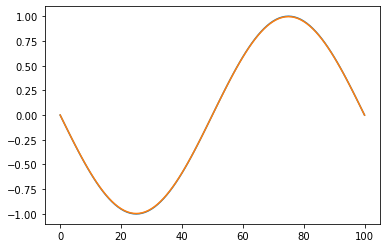

1 0.9921224889158693


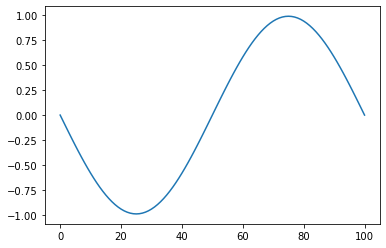

2 0.9882070347097693


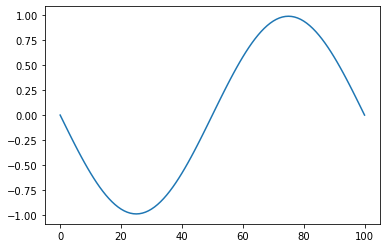

3 0.9843070330126187


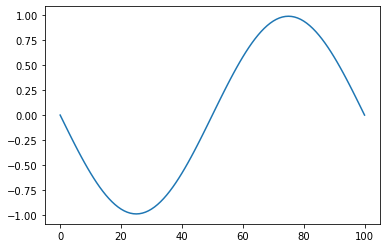

4 0.9804224228404291


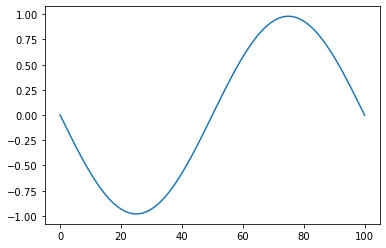

5 0.9765531434498689


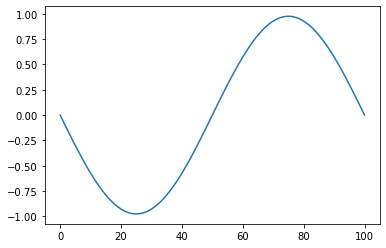

6 0.9726991343373884


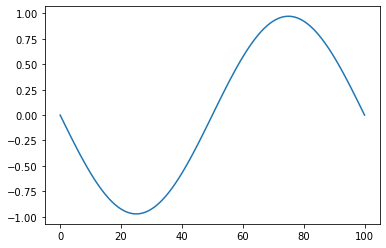

7 0.9688603352380574


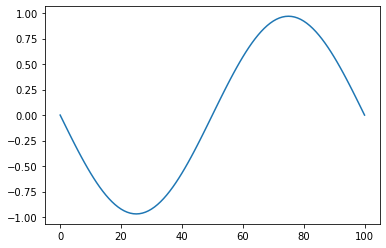

8 0.9650366861252428


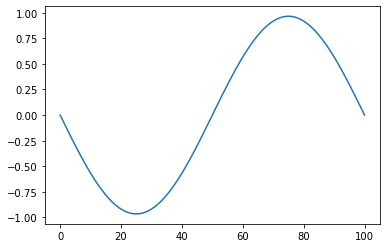

9 0.9612281272078991


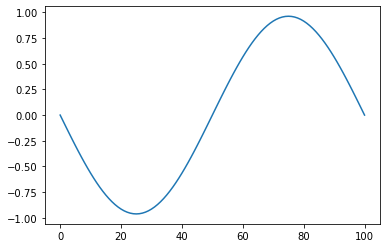

10 0.9574345989346852


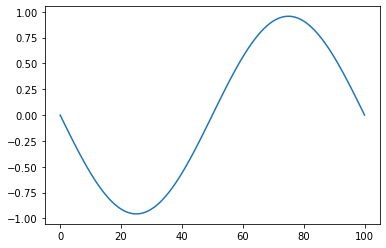

11 0.9536560419786244


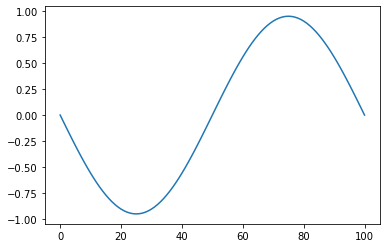

12 0.9498923972772999


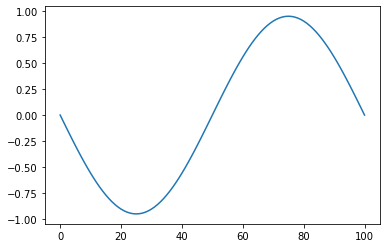

13 0.9461436059144201


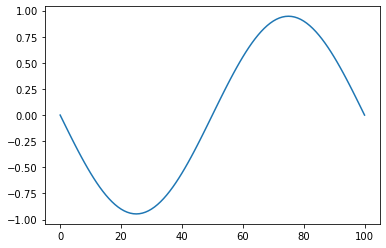

14 0.9424096094552437


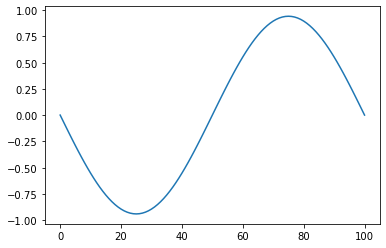

15 0.938690348981114


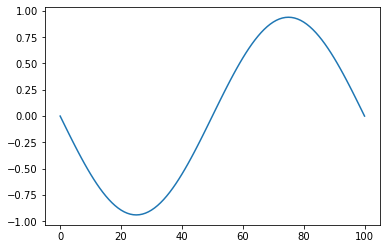

16 0.9349857678603561


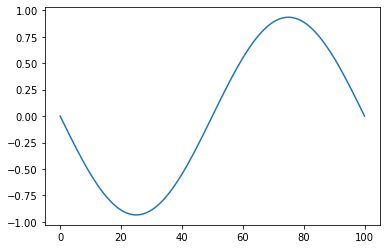

17 0.9312958037648654


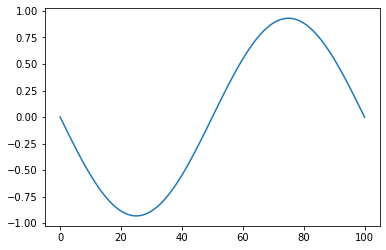

18 0.9276204117081565


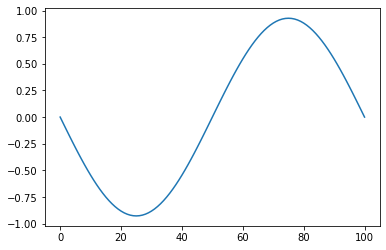

19 0.9239594974054494


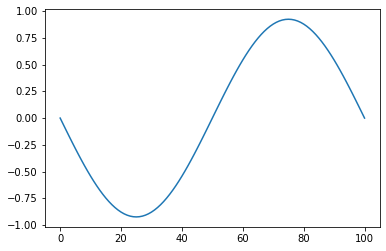

20 0.9203131104327396


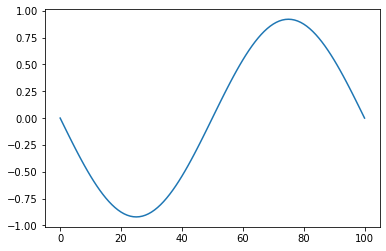

21 0.9166808831783584


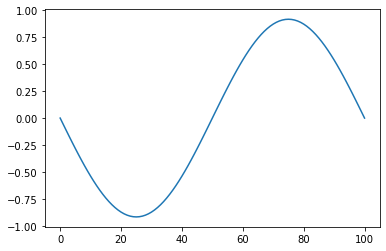

22 0.9130636636695394


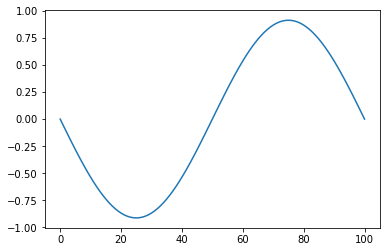

23 0.9094587545726471


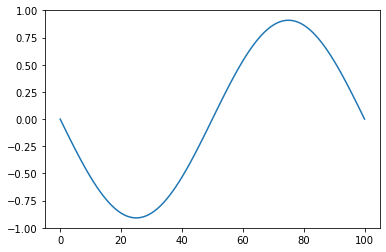

24 0.9058738200352741


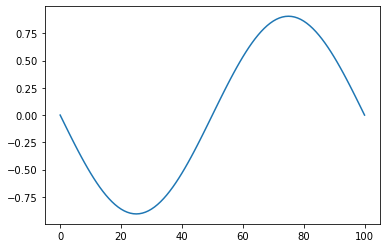

25 0.9022861959438816


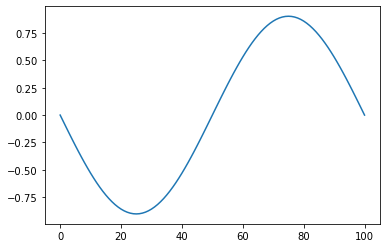

26 0.8987621291454632


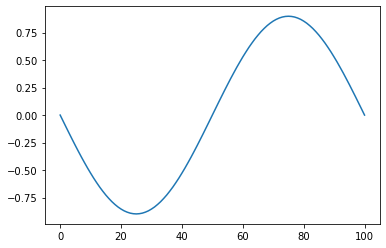

27 0.8951068462785884


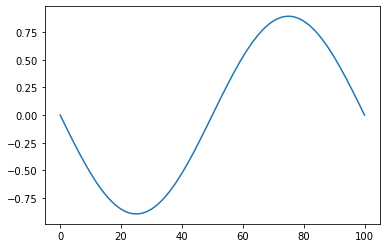

28 0.8918928710178167


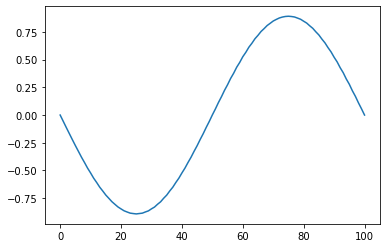

29 0.8875693830182116


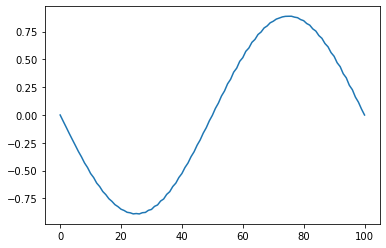

30 0.8866995529748736


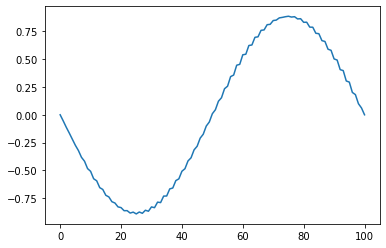

31 0.8899623352289083


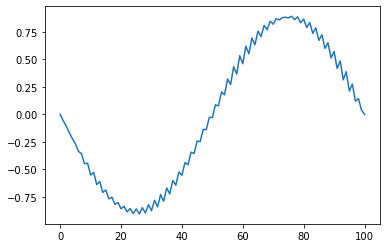

32 0.9197331523930518


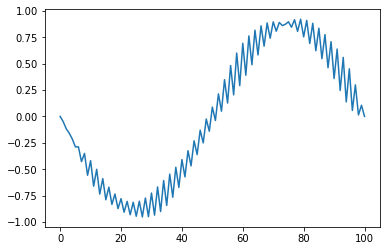

33 1.1006164978727226


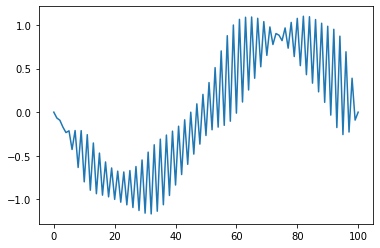

34 2.0760211157832202


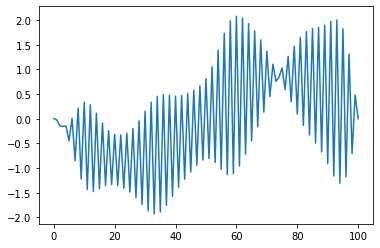

35 5.172631397011649


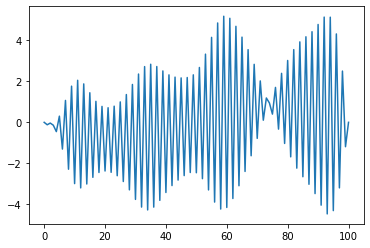

36 14.724455025536368


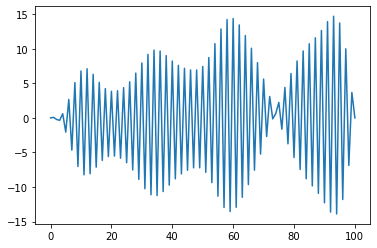

37 42.3661940843499


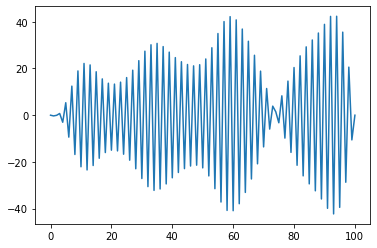

38 126.92827464541256


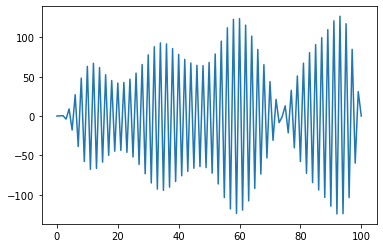

39 372.41164989785733


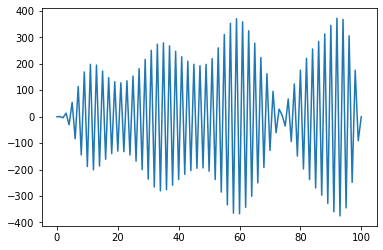

40 1116.2367234763874


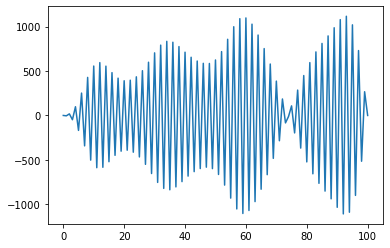

41 3302.323533551688


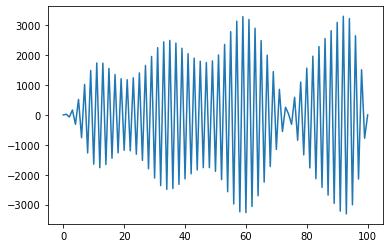

42 9840.281555753583


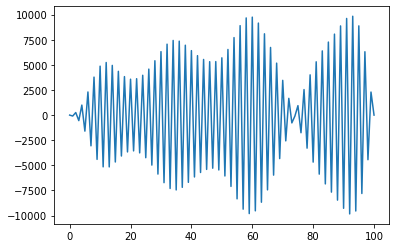

43 29296.324505543485


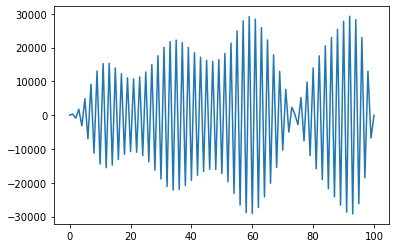

44 86786.41058160333


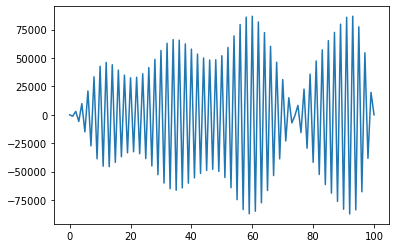

45 259906.69468498492


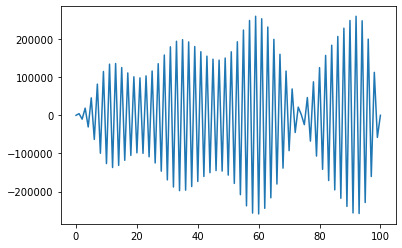

46 772063.0146112703


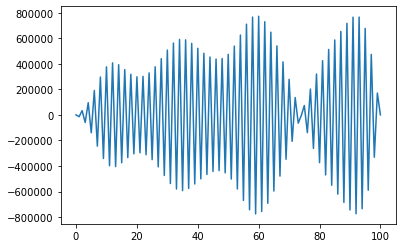

47 2312632.443438844


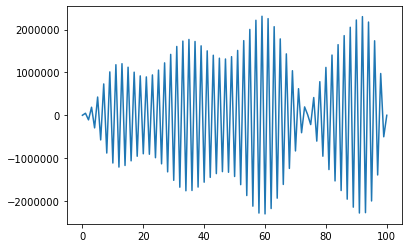

48 6873614.022976721


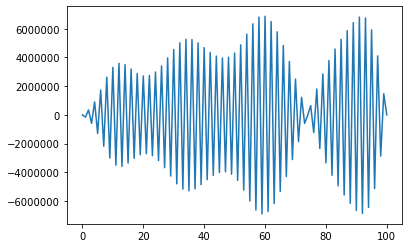

49 20588138.161407344


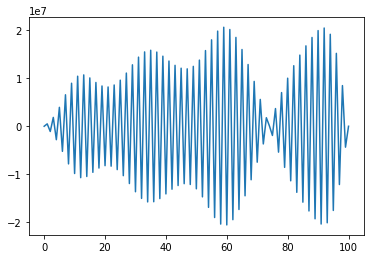

In [37]:
import numpy as np
import matplotlib.pyplot as plt

nxp=101; nxc=nxp-1; xTot=1.0; 
dx=xTot/nxc; xMin=-xTot/2.0; xMax=xTot/2.0
steps=1000; totalTime=1.0; plotEverySteps = 100; 
deltaTime=totalTime/steps
diffusivity=1e-1; r = deltaTime*diffusivity/(dx*dx)

X = np.arange(nxp)*dx+xMin
T = np.sin(2*np.pi*X)

print('r=',r)
DT=np.zeros(nxp)
plt.plot(T)
for time in np.arange(50):
    DT[1:nxp-1]=T[0:nxp-2]-2*T[1:nxp-1]+T[2:nxp]
    T += r * DT
    print(time,np.max(T));
    plt.plot(T)
    plt.show()    

### Exercise 8
Start from the above program and change r until you reach stability. What is the critical value from stability to instability? (Hint: search somewhere between 0 and 1).

In [38]:
# Here write your solution










Where $X$ is space, $T$ is the temperature, and the system is initialized with a smooth sinusoidal initial temperature. The system is explicit in the sense that the Laplacian of the temperature field, used to calculated the Temperature increment, is calculated at the old time-step and then used to calculate the new temperature field. 

By playing with any parameter that changes the coefficient $r$, one discovers that regardless on the quality of the result (that can be very with with many short time-steps), as soon as the coefficient $r$ is above the value $0.5$, the system becomes completely unstable. 

This is a typical example of counterintuitive aspects of Numerical modeling. Why does this instability appear? What happens is that for $r>05$ small perturbations amplify exponentially. This can be understood from the line $T += r * DT$. Given that $DT$ for certain part of the function $T$ becomes two times the difference between the temperature in one point and its neighboring one, when $r$ is greater than $0.5$ then $r*DT$ becomes greater than this difference and therefore at the next time-step the difference between the temperature at one node and the temperature of the next node becomes greater, triggering this instability. 

## Explicit formulation using operators

Before discussing about how the stability problem can be solved, let's look at how we can use the operators that we introduced in the past experience to obtain the same result.

### Exercise 9
Start from the operator that we introduced in the previous experiences and use it check the same transition from stable to unstable explicit diffusion. Is the use of the operator faster or slower than the above implementation? Use %timeit to quantify it

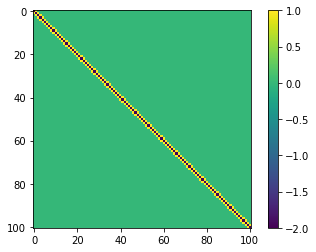

r= 0.47619047619047616
2099 0.022196010723057703


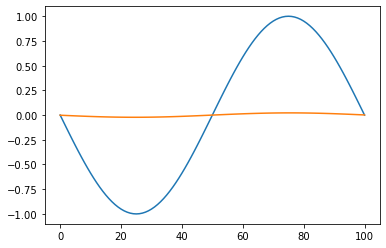

In [39]:
# here you can write your solution


nxp=101; nxc=nxp-1; xTot=1.0; 
dx=xTot/nxc; xMin=-xTot/2.0; xMax=xTot/2.0
steps=2100; totalTime=1.0; plotEverySteps = 100; 
deltaTime=totalTime/steps
diffusivity=1e-1; r = deltaTime*diffusivity/(dx*dx)

X = np.arange(nxp)*dx+xMin
T = np.sin(2*np.pi*X)


d2dx2OpForBack = (np.diag(np.ones(nxp-1),-1) - 2*np.diag(np.ones(nxp),0) + np.diag(np.ones(nxp-1),1))
plt.imshow(d2dx2OpForBack);plt.colorbar();plt.show()

print('r=',r)
DT=np.zeros(nxp)
plt.plot(T)

for time in np.arange(steps):
    DT = d2dx2OpForBack.dot(T)
    T += r * DT
print(time,np.max(T));
plt.plot(T)
plt.show()  






Where the Laplacian only updates the internal values of the nodes of the Temperature. In a real scenario the external temperature nodes could be set to values that depend on Boundary conditions. This sophisticated approach does not solve stability, but these operators will turn to be very useful for developing implicit formulations. The reader is however invited to test this formulation to empirically find the critical $r$. 

It is clear here that since instabilities arise for very small time-steps, it would be desirable to use another incremental procedure for the diffusion equation. However it is important to keep in mind that explicit solver are really extremely fast and for small time-steps produce accurate solutions, therefore when other complications in the numerical model such as severe nonlinearities in the solution of the momentum equation limit time steps below critical stability, the use of explicitly temperature diffusion is still commonly used. Clearly in this case it is essential to check at every time-step that the critical $\Delta t$ is never reached. 



## Implicit Formulation

The way to overcome the limitations of the explicit formulation is to embed the future solution into the calculation of the temperature (or other field) diffusion increment. This approach requires in some way to invert the **Laplacian** operator that we introduced previously. This more computationally demanding approach has however the ability to offer more accurate solutions and in particular it is unconditionally stable for any $\Delta t$.

If we rewrite the 1D discretization of the diffusion equation changing the right hand side and calculating it on the final time-step instead of the initial one the equation appears as follow:

\begin{equation}
\frac{ T^{t+\Delta t} \left( x_i \right) - T^t \left( x_i \right) } {\Delta t} = k \frac{T^{t+\Delta t} \left( x_{i+1} \right) -2T^{t+\Delta t} \left( x_i \right) + T^{t+\Delta t} \left(x_{i-1} \right)}{\Delta x ^2} 
\label{eq-diff-impl-1D}
\end{equation}

Now, following the same procedure of \sect{sec-diff-expl} we rewrite the new values of the field T in function of the old one as well as of the new one:

\begin{equation}
T^{t+\Delta t} \left( x_{i} \right) = T^t \left( x_i \right) + r * \left[ T^{t+\Delta t} \left( x_{i+1} \right) -2T^{t+\Delta t} \left( x_i \right) + T^{t+\Delta t} \left(x_{i-1} \right) \right]
\label{eq-diff-impl-1D-2}
\end{equation}

where again $r=k \Delta t / \Delta x^2$. Contrary to the explicit formulation, the new values of the field T depend on the old and on the new values themselves. As we see in the following this inhibits the instabilities that we saw before to arise. 

To solve the above equation we need to group all the terms containing $t+\Delta t$:

\begin{equation}
\left( 1+2r \right) T^{t+\Delta t} \left( x_{i} \right) -r T^{t+\Delta t} \left( x_{i+1} \right) -r T^{t+\Delta t} \left(x_{i-1} \right)  = T^t \left( x_i \right)
\label{eq-diff-impl-1D-3}
\end{equation}

Since the terms at the next time-step are unknown, this equation cannot be written as a simple increment to the old time-step, but it requires the solution of N coupled linear equations, representing the new temperature vector as an evolution of the old temperature field. This has an operator formulation. 

Calling $\mathbf{T}^t$ the  vector of all solutions at the time $t$, the above equation can be written in a compact form at ever point as:

\begin{equation}
\mathsf{(I+A)} \mathbf{T}^{t+\Delta t} = \mathbf{T}^{t}
\end{equation}

where $I$ is the identity matrix, $\mathsf{A}$ represents the evolutionary tridiagonal matrix characterized by $2r$ on the diagonal and $-r$ on the sides of the diagonal, while all the other components of $\mathsf{A}$ are zero. 

The above system can be solved just by finding the inverse matrix $\mathsf{B}=\mathsf{(I+A)}^{-1}$. A matrix is always invertible if the determinant is non-zero (because the determinant is equal to the product of all the eigenvalues, and if no-eigenvalue is zero it can be inverted), which is our case for every non-zero value of $r$. This implies that there is a stable solution for every time-step, although a larger time-step will be less correct. We have so a straightforward expression to use in Python to find the next temperature distribution, given the old one:

\begin{equation}
\mathbf{T}^{t+\Delta t} = \mathsf{(I+A)^{-1}} \mathbf{T}^{t} = \mathsf{B} \mathbf{T}^{t}
\end{equation}

For simplification I will create a function that generates the  tridiagonal matrix that I have introduced above by using the feature of the **diag** function in NumPy and in sparse, for comparison. One might wonder why not creating immediately only a sparse matrix and work only with them. The problem is that, as we will see, the inverse of a sparse matrix is not always sparse and if a matrix is dense it is more efficient to treat it as a normal NumPy array. Let's start with a dense matrix:




r: 100.00000000000001


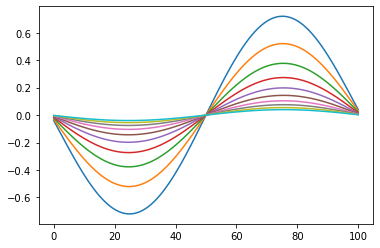

In [40]:
import numpy as np

def tridiagDense(r, nxp, k1=-1, k2=0, k3=1):
    a = np.ones(nxp-1)*(-r)
    b = np.ones(nxp)*(2.*r)
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(a, k3)

nxp=101; nxc=nxp-1; xTot=1.0; dx=xTot/nxc; xMin=-xTot/2.0; xMax=xTot/2.0
steps=10; totalTime=1.0; plotEverySteps = 1; deltaTime=totalTime/steps
diffusivity=1e-1; r = deltaTime*diffusivity/(dx*dx); print('r:',r) 

IA = np.identity(nxp)+tridiagDense(r,nxp) # I+A
B = np.linalg.inv(IA) # inverse dense matrix

# initialization
X = np.arange(nxp)*dx+xMin 
T = np.sin(2*np.pi*X)

for time in np.arange(steps):
    T = B.dot(T)  #temperature at t + deltaTime
    plt.plot(T)
    

### Exercise 10
Change the value of r and make it small or large and verify that the solver is unconditionally stable. However verify also for which $r$ is the quality of the solution not accepptable anymore.

In [41]:
# here write your solution















This approach returns immediately the same correct solution of the explicit approach, but now we are not limited anymore to small values of $r$. One can in fact obtain the same solution that required $1000$ steps with the explicit approach, in only $10$ steps with the implicit approach. This implies that not only is the implicit approach stable, but it is also very accurate. 

The reason for the extraordinary accuracy is largely due to the structure of the inverse matrix. This is not a sparse matrix like the explicit ones. The lack of sparsity increases with $r$, and therefore with its ability to propagate the present solution in the future. Let's visualize the matrices $IA$ and $B$:

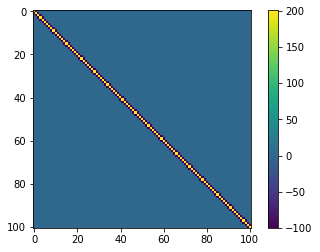

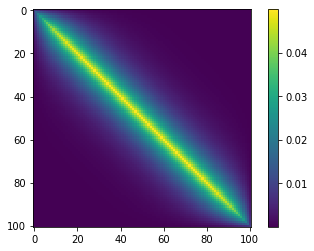

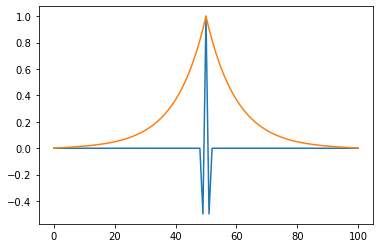

In [42]:
plt.imshow(IA);plt.colorbar();plt.show()
plt.imshow(B);plt.colorbar();plt.show()

plt.plot(IA[nxp//2]/IA.max())
plt.plot(B[nxp//2]/B.max())
plt.show()


The lack of sparsity of the inverse matrix is important for large problems. The size of the matrix that we have to invert scales like the square of the number of points. So on a normal computer if we have $10000$ points we will have a matrix with $100$ millions of entries, which is already close to its memory limits. And this is only equivalent to a $100 \times 100$ 2D problem. 

### Exercise 11
Plot the matrix and in particular the central section of the matrices IA and B changing r. Do the values far from zero increase, decrease or remain the same when r increases? What are the implications for turning this matrix into a sparse matrix? For example, if you assign to zero the values that are close to zero, will the result change? Try!

r: 10.0


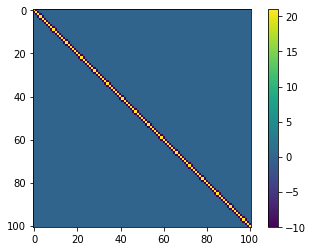

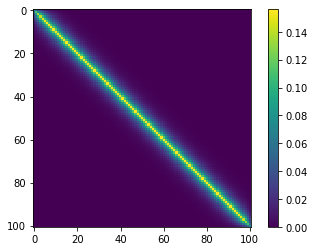

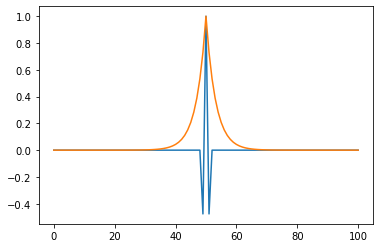

In [43]:
# here write your solution

nxp=101; nxc=nxp-1; xTot=1.0; dx=xTot/nxc; xMin=-xTot/2.0; xMax=xTot/2.0
steps=100; totalTime=1.0; plotEverySteps = 1; deltaTime=totalTime/steps
diffusivity=1e-1; r = deltaTime*diffusivity/(dx*dx); print('r:',r) 

IA = np.identity(nxp)+tridiagDense(r,nxp) # I+A
B = np.linalg.inv(IA) # inverse dense matrix

plt.imshow(IA);plt.colorbar();plt.show()
plt.imshow(B);plt.colorbar();plt.show()

plt.plot(IA[nxp//2]/IA.max())
plt.plot(B[nxp//2]/B.max())
plt.show()


The use of sparse libraries for calculating the matrix inverse is not helpful either. For example we could have defined the tridiagonal matrix as a sparse one with the function $tridiagSparse$, then inverting it with the sparse libraries of scipy. This would have been written for example as follows: 

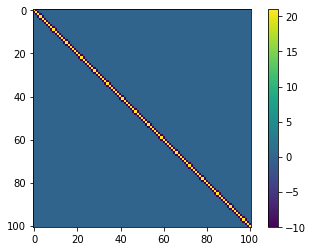

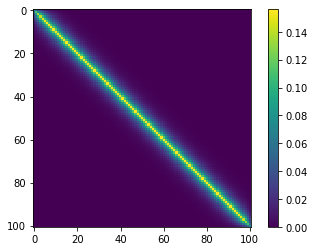

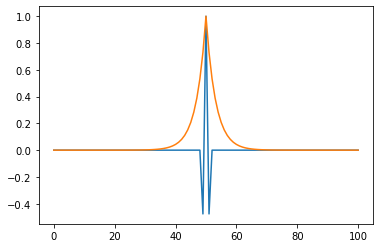

In [44]:
import scipy.sparse as sparse
import scipy.sparse.linalg as la

def tridiagSparse(r, nxp, k1=-1, k2=0, k3=1):
    a = np.ones(nxp)*(-r)
    b = np.ones(nxp)*(2.*r)
    return sparse.dia_matrix(([a,b,a],[k1,k2,k3]),shape=(nxp,nxp)).tocsc()
    
IA = sparse.eye(nxp).tocsc()+tridiagSparse(r,nxp)
B = la.inv(IA)

plt.imshow(IA.toarray());plt.colorbar();plt.show()
plt.imshow(B.toarray());plt.colorbar();plt.show()

plt.plot(IA.toarray()[nxp//2]/IA.max())
plt.plot(B.toarray()[nxp//2]/B.max())
plt.show()

However this does not bring any substantial advantage. A test of the two approaches shows that the sparse matrix approach is about twice as slow as the dense one for $nxp=1000$, regardless to the value of $r$. 

**The generally agreed solution for solving implicitly a system where the inverse matrix is known to be dense, is to not to calculate the dense matrix at all!!** The inverse problem, in fact, can be solved using a sparse solver. In this specific case, instead of calculating the inverse of $I+A$, the inverse problem $\mathsf{(I+A)} \cdot \mathbf{T}^{t+\Delta t} =  \mathbf{T}^{t}$ is solved as such. This can be done as: 

0.10648298263549805


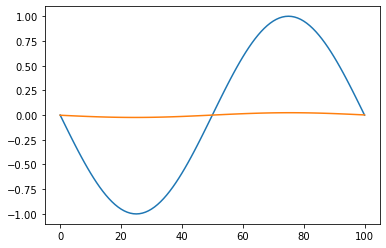

In [45]:
import time
IA = sparse.eye(nxp).tocsc()+tridiagSparse(r,nxp)
#B = (la.inv(IA)).todense()
#print(r)
#plt.imshow(IA.todense());plt.colorbar();plt.show()
#plt.imshow(B);plt.colorbar();plt.show()
#print(B.shape)
t0=time.time()
T = np.sin(2*np.pi*X)
plt.plot(T)
for thisStep in np.arange(steps):
    T = la.spsolve(IA,T)
print(time.time()-t0)
plt.plot(T)
plt.show()

### Exercise 12
Remember that operators can be multiplied one by another. So, instead of calculating the evolution of the vector T from one step to the next, **steps** times, we can multiply the operator by itself **steps** times (or, if it is a constant operator, calculate the **steps** power of it) and then use the result to calculate the solution. Will it work? Do it as an exercise!


In [46]:
# Here write your solution











This approach requires the same computing time of the dense approach for $nxp=1000$ but it then works also efficiently for greater problem sizes, while the dense matrix approach simply cannot be applied because the matrices reach computer size. 

### Exercise 13
Do a scaling test if the three approaches and plot the time required to solve one timestep for different resolutions. For which problem size does the sparse solver become the best one? 


In [47]:
# Here write your solution









